In [1]:
import pandas as pd
import numpy as np

df_train=pd.read_csv("/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_train.csv")
df_test=pd.read_csv("/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_test.csv")

In [2]:
df_train.columns = ['label', 'query']
df_train.head()

,label,query
0,atis_flight,what flights are available from pittsburgh to...
1,atis_flight_time,what is the arrival time in san francisco for...
2,atis_airfare,cheapest airfare from tacoma to orlando
3,atis_airfare,round trip fares from pittsburgh to philadelp...
4,atis_flight,i need a flight tomorrow from columbus to min...


In [3]:
df_train['label']

0            atis_flight
1       atis_flight_time
2           atis_airfare
3           atis_airfare
4            atis_flight
              ...       
4828        atis_airfare
4829         atis_flight
4830        atis_airline
4831         atis_flight
4832         atis_flight
Name: label, Length: 4833, dtype: object

In [4]:
df_train['label'].unique()

array(['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft',
       'atis_ground_service', 'atis_airline', 'atis_abbreviation',
       'atis_quantity'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder

# instantiate label encoder object
le = LabelEncoder()


df_train['label'] = le.fit_transform(df_train['label'])

In [6]:
df_train.head()

,label,query
0,4,what flights are available from pittsburgh to...
1,5,what is the arrival time in san francisco for...
2,2,cheapest airfare from tacoma to orlando
3,2,round trip fares from pittsburgh to philadelp...
4,4,i need a flight tomorrow from columbus to min...


In [7]:

from keras.preprocessing.text import Tokenizer

from keras.utils import pad_sequences
from keras.utils import to_categorical
MAX_SEQUENCE_LENGTH = 10
MAX_NUM_WORDS = 5000
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(df_train['query'])
sequences = tokenizer.texts_to_sequences(df_train['query'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(df_train['label'])
x_train=data
y_train=labels
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Found 871 unique tokens.
Shape of data tensor: (4833, 10)
Shape of label tensor: (4833, 8)


In [8]:
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM
atis_rnnmodel = Sequential()
atis_rnnmodel.add(Embedding(MAX_NUM_WORDS, 128))
atis_rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
atis_rnnmodel.add(Dense((8), activation='sigmoid'))
atis_rnnmodel.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics= ['accuracy'])

In [9]:
history=atis_rnnmodel.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
31/31 [==============================] - 6s 78ms/step - loss: 0.4108 - accuracy: 0.7268 - val_loss: 0.2046 - val_accuracy: 0.7497
Epoch 2/10
31/31 [==============================] - 2s 58ms/step - loss: 0.1919 - accuracy: 0.7605 - val_loss: 0.1896 - val_accuracy: 0.7497
Epoch 3/10
31/31 [==============================] - 2s 56ms/step - loss: 0.1773 - accuracy: 0.7610 - val_loss: 0.1628 - val_accuracy: 0.7642
Epoch 4/10
31/31 [==============================] - 2s 55ms/step - loss: 0.1427 - accuracy: 0.7781 - val_loss: 0.1250 - val_accuracy: 0.8128
Epoch 5/10
31/31 [==============================] - 2s 58ms/step - loss: 0.1173 - accuracy: 0.8319 - val_loss: 0.1078 - val_accuracy: 0.8728
Epoch 6/10
31/31 [==============================] - 2s 57ms/step - loss: 0.1004 - accuracy: 0.8771 - val_loss: 0.1030 - val_accuracy: 0.8707
Epoch 7/10
31/31 [==============================] - 2s 57ms/step - loss: 0.0867 - accuracy: 0.8934 - val_loss: 0.0825 - val_accuracy: 0.9069
Epoch 8/10
31

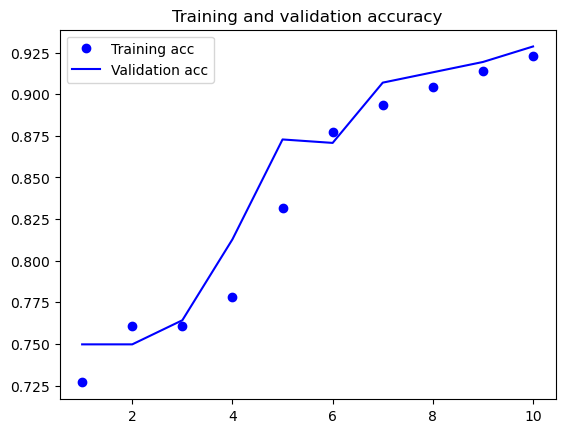

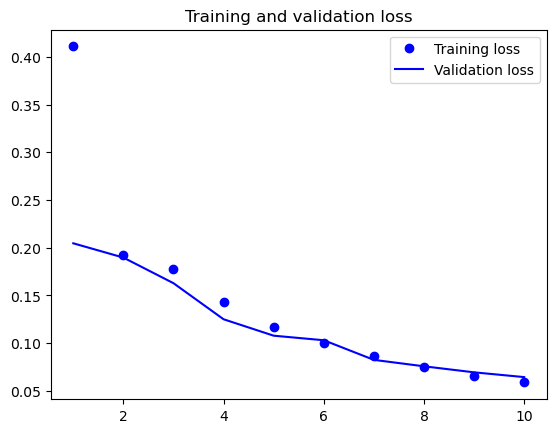

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [11]:
Xnew=["fare of flights  from columbus to chennai"]
sequences_new = tokenizer.texts_to_sequences(Xnew)
data = pad_sequences(sequences_new, maxlen=MAX_SEQUENCE_LENGTH)

yprob = atis_rnnmodel.predict(data)
yclasses=yprob.argmax(axis=-1)
# show the inputs and predicted outputs
print(yclasses)

1/1 [==============================] - 0s 346ms/step
[2]


In [12]:
atis_rnnmodel.save("intent classification.h5")